# COMPUTER SCIENCE 1MD3 Final Examination
### Instructor: Mr NIcholas Moore

## Late submissions will not be accepted.

The only proof that your test was completed on time is on time submission.

### Highest possible grade: (49 / 44)

### Special Instructions - Please read

* DO NOT RENAME THE ASSIGNMENT FILE (otherwise it might not be submitted or graded).
* DO NOT USE FUNCTION NAMES OTHER THAN THOSE PROVIDED IN THE QUESTION (or you will get zero for the question).
* DO NOT CHANGE THE THE NUMBER OF FUNCTION ARGUMENTS, USE THEM AS PROVIDED.
* Validate your notebook before submitting
* You must Submit the assignment from the assignments tab before the deadline.  Late submissions will not be accepted.  The only proof that your work was completed before the deadline is an on-time submission.
* If you are having trouble with the server not responding, you are probably trying to execute and infinite loop.  To remedy this:
    * click the stop button on the tool bar (proportional response), or
    * go to \"Control Panel\" >> \"Stop My Server\" >> \"Start My Server\" (nuclear option).  Note that you will lose any unsaved work with this one.
 
This test became available at 9:00am EST, Thursday December 10th, and must be submitted by 9:00am EST, Friday December 11th.

THERE IS NO GRACE PERIOD FOR EXAM SUBMISSIONS.  YOU MUST SUBMIT BY THIS TIME OR YOU WILL GET ZERO.

This is an open-book test, which means you are permitted to use reference material, such as wikipedia and the python documentation at python.org

This is NOT a collaborative assessment.  This exam will be evaluated for plagiarism, and offenders will certainly be prosecuted.  Remember: never share your password, and never share your code! People who share their code are just as guilty of plagiarism as those who use it. 

If you have questions for myself or the TAs, please submit them to the Piazza.  Please do not share your solutions on Piazza (or any other website).  

### Ensure all your function names and class field names are EXACTLY AS SPECIFIED.

#### We will have no sympathy whatsoever for the submission of code which does not compile due to syntax errors.

Good luck! 

## Question 1: Recursive Determinant (8 points)

The formula for calculating a determinant may be generalized as follows:
- Take each element in the first row of the matrix (we shall call it $x$).
    - Create a new matrix by deleting the row and column in which this number resides.
    - Calculate (RECURSIVELY!) the determinant of this reduced matrix.
    - multiply it by either $x$ or $-x$, if it is an odd or even numbered element of the first row respectively.  This definition uses 1-indexing, rather than 0-indexing, so you'll need to adjust your algorithm accordingly.  
- Take the sum of all the values produced by the above algorithm, and that is your determinant! 

Write a function in python, `recDet(M)`, which takes a matrix `M` of arbitrary size, expressed as a two-dimensional tuple, and calculates the determinant using the above recursive algorithm.  Your algorithm will be graded not only on correctly calculating the determinant, but also on using the correct number of recursive calls, which have been indicated in the visible test cases.   

Assumptions:
- You may assume that the number of rows will always equal the number of columns (i.e., that the matrixes are square).
- You may assume that the size of the matrix M is >= 1.

NOTE: The determinant of a 1x1 matrix is simply the only value in it.  (This is your base case, yo)

NOTE NOTE: I know you can use numpy to calculate this, but any wise guys who do will get marks equal to the effort they put in... zero!  Be warned!  The autograder will 100% be able to tell the difference. 

References:
https://mathworld.wolfram.com/Determinant.html
http://mathcentral.uregina.ca/QQ/database/QQ.09.07/h/rav1.html

(FYI, the professor's solution is 23 lines of code)

In [1]:
# YOUR CODE HERE
def recDet(M):
    steps=0
    XM=[]
    for i in M:
        XM.append(list(i))
    nrowz=len(XM)
    for alpha in XM:
        if len(alpha)!=nrowz:
            raise Exception("Error")
    while len(XM)<=1:
        steps+=1
        return XM[0][0]
    else:
        steps+=1
        bat=0
        oop= [[row[j] 
    for j in range(1,len(XM))] 
         for row in XM]
        for i in range(len(XM)):
            fin=oop[:]
            fin.pop(i)
            if i % 2 == 0:
                steps+=1
                bat+=XM[i][0]*recDet(fin)
            else:
                steps+=1
                bat-=XM[i][0]*recDet(fin)
        
        

    #print(steps)
    return bat


In [3]:
M = ( ( 1, 2 )
    , ( 2, 3 )
    )

print(recDet(M) == -1)
# Number of recursive steps = 3
# (This includes the root invokation of recDet)

M = ( ( 1, 2, 3 )
    , ( 2, 3, 7 )
    , ( 4, 5, 6 )
    )

print(recDet(M) == 9)
# Number of recursive steps = 10
# (This includes the root invokation of recDet)

M = ( ( 5,6,7,1,3,2,9 ) 
    , ( 8,9,1,4,2,9,9 )
    , ( 4,2,5,6,1,9,2 )
    , ( 0,1,4,6,2,8,3 )
    , ( 9,5,6,7,8,4,2 )
    , ( 0,0,1,4,2,4,2 )
    , ( 4,2,4,6,1,7,9 )
    )


recDet(M) == -34704
# Number of recursive steps = 8660
# (This includes the root invokation of recDet)

True
True


True

### Question 2 : SQL Database to CSV File Conversion (5 points)

Write a function, `sql2csv(fileIn, table, fileOut)`, which given a database specified by the file name `fileIn` extracts all data from the table `prisoners`.  The function then creates a file with the name `fileOut`, and writes the extracted data in CSV format.  Do not include a header row in this output csv file. 

If opening the database file fails for any reason, append `".db"` to the file name and try it again.  If it still doesn't work, allow the raised exception to go unhandled.  

NOTE: The first and last fields are strings.  In a typical CSV file these strings would be enclosed in quotes.  In this case we won't worry about this problem.  

NOTE NOTE: If you somehow manage to break the database file, you can always get a fresh copy from Avenue.  

(Professor's solution : 14 lines of code)

In [4]:
import sqlite3
import csv 
def sql2csv (fileIn, fileOut) :
    book=open(fileOut,'w')
    write=csv.writer(book)
    db=sqlite3.connect(fileIn)
    alpha=db.cursor()
    alpha.execute("select*from prisoners")
    x=alpha.fetchall()
    print(x)
    for element in x:
        element=list(element)
        write.writerow(element)
        
#         bc=[]
#         for record in element:
#             bc+=[record]
#         write.writerow(bc)
    book.close()
    db.close()
    


In [5]:
# Only one test case!  
import filecmp 
sql2csv("MorkDork.db", "morkdork.csv")
print(filecmp.cmp("morkdork.csv", "morkdork_good.csv"))

OperationalError: no such table: prisoners

### Question 3: In A Hurry (6pts)
In the the golden days of ye old pre-coronaviridae, Fiona commuted to work each day. 
    - Without rush-hour traffic, her commute time one way is 2 hours.
    - While in rush-hour traffic, she travels at half her normal speed.  If she were to spend her entire commute in traffic, it would take 4 hours.  
    - Rush-hour is:
        - from 7am to 10am and from 3pm to 7pm daily.
    
Write a function `arrival(departure)` that, given Fiona’s departure time expressed as a string, returns another string indicating her arrival time.  Please perform all calculations (including whether Fiona is in rush hour traffic) by the minute, not by the second.   

Both strings are in the same format: `"YYYY/MM/DD HH:MM"`
    - For example, `"2020/12/25 18:37"`

Prof's solution: 11 lines

HINT: Topic 6, slides 9 and 10.

In [3]:
from datetime import datetime,timedelta
def arrival(departure):
    without= datetime.strptime(departure,"%Y/%m/%d %H:%M")
    m=without.minute
    h=without.hour
    
    my=0
    while my<120:
        
        if h in range(7,10) or h in range(15,19) :
            
            without += timedelta(minutes=2)
            m+=2
        else:
            
            without += timedelta(minutes=1)
            m+=1
        if m % 60 == 0 or m>60 :
            m=0
            h += 1
        my+=1
    
    return without.strftime("%Y/%m/%d %H:%M")

In [7]:
print(arrival("2020/01/01 07:00") == "2020/01/01 10:30")
print(arrival("2020/12/31 23:00") == "2021/01/01 01:00")
print(arrival("2020/01/31 5:23") == "2020/01/31 07:46")
print(arrival("2020/01/31 17:25"))

True
True
True
2020/01/31 20:13


### Question 4: COMPSCI 1MD3 FINAL BOSS: Checkers (24 points) 

A checkers board starts out in the following configuration.

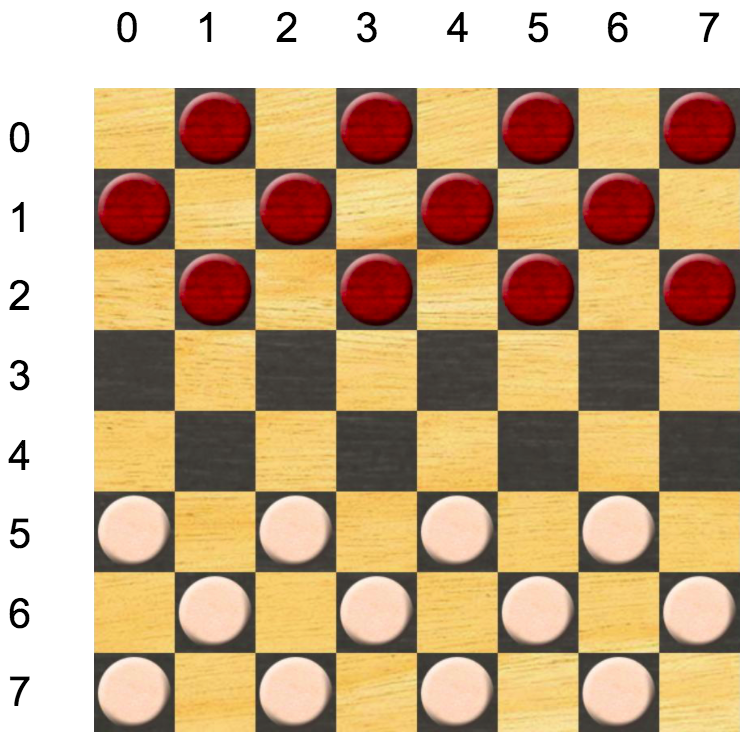

Players take turns, moving one playing piece (checker) at a time according to the rules below.  The game ends when one player has no checkers left. The player with checkers remaining is the victor.   

Rules for moving checkers:
- A checker may only move ahead diagonally to the right or left, unless jumping another checker.
    - "Ahead" means up for white, and down for red on the board pictured above
   
- A checker may "jump" an opponent's checker if the opponent is in one of the spots the checker could ordinarily move to (ahead to the right or left).  
    - The checker may "jump" the opponent by moving two spaces diagonally in a straight line, so long as the space it would land in is unoccupied.
    - Once a jump has been performed, that checker has the opportunity to jump another piece, if it has the ability to do so.  
        - This may continue for as many jumps as are possible
        - A checker which is not a king (see below) may not jump backwards, even in a chain of jumps (English Rules!)
    - Any checkers which have been jumped are removed from the board, or "captured."
        - It is only through jumping all of your opponents checkers that a game may be won.  
- If a checker reaches the other side of the board, it is "kinged".  This playing piece may now move in any of the four diagonal directions.
    - Reaching the end of the board immediately stops a chain of jumps
    - A king may jump in any direction as well.  
    
In some version of this game, if one of your pieces can jump the opponent, you are forced to make that move.  To keep things simple, we will not be implementing this rule, though your professor thinks it's a good rule:
- It improves the strategy by advantaging players who think several turns ahead.
- Checkers games can have a tendency towards players mirroring each other and playing highly defensively.  This slows the game considerably, and can even make it boring.  Being able to sacrifice a piece to force a jump and break your opponent's fortifications makes it much more interesting in my opinion.

But anyway, on to the question.

You have been provided with two things:
- A string conversion method within a `CheckersGame` class which prints out the current state of a checkers game.
- A `runGame` script which prompts the user for inputs, and feeds those inputs into the CheckersGame class.  It's an interactive game of checkers!   

These functions will help you to test and run your program. You are responsible for creating the rest of this algorithm.  

### Initialization (2 points)
The initializer shall take no arguments other than self and create three fields:
- `board`
    - An 8x8 two-dimensional list, initialized to the above starting position for a checkers board.  The board will contain integer values, corresponding to the various things that can occupy spaces on the board.  
        - 0 -> empty space
        - 1 -> white checker
        - 2 -> red checker
        - 3 -> white king
        - 4 -> red king
- `whoseMove`
    - keeps track of whose turn it is to move. Initializes to `"white"`
- `isWon`
    - keeps track of whether the game has been won or not.  If the game has been won, this field will either `"red"` or `"white"`, depending on who has won.

### Methods 
In addition, you will need the following methods.

- `parseMove()` (prof's solution: 10 lines of code) (3 points)
    - The user will input moves to a command line interface in the following form: 
        - "YX YX ..."
    - Y and X are numbers between 0 and 7, which correspond to co-ordinates on the game board.
    - The first coordinate entered is the coordinate of the piece you wish to move.
    - The second is where you wish to move it to.  
    - This function must return a list of tuples.  
        - Each tuple must be of length two.
        - The first element is the **row (Y)**
        - The second element is the **column (X)**
    - This string may have many coordinates (for when jumping multiple pieces).
    - If for any reason the string provided is not a valid set of coordinates (out of range, no spaces, etc.), raise a ValueError.
    - There are some test cases below.  


- `checkWinner()` (prof's solution: 14 lines of code) (2 points)
    - Red wins if there are no white pieces remaining. 
    - White wins if there are no red pieces remaining.
    - This method updates the `isWon` attribute accordingly.


- `changeTurn()` (prof's solution: 12 lines of code, but you could get away with 5) (1 point)
    - If it's currently Red's turn, change to White, and vice versa.
    - If you decided to keep any extra data relating to the following, it should be updated:
        - Which board values are currently active
        - Which board values are currently enemies
        - Which direction pieces are travelling on the board
        - Any other movement related data that you may wish to keep. 

- `move()` (prof's solution: 25 lines of code) (6 points)
    - Given a move, expressed as a string, modify the class attributes to reflect the move encoded in the string.
    - You may assume that the input represents a valid move.
    - The move operation will consist of three things, two of which we have already written methods for:
        - Updating the board
        - Changing whose turn it is
        - Checking to see if the game is won, and updating appropriately. 

- `isValidMove()` (prof's solution: 45 lines of code) (10 points)
    - In this algorithm, we are going to separate the code that checks that a move is valid from the code that actually mutates the state of the board.  
    - Given a move, expressed as a string, return True if this move is a valid move for the player whose turn it is.  
    - Bear in mind that the input is an unparsed string, so you may want to use one of the other methods in your class to parse it *(waggles eyebrows)*.
    - No move is valid on a game that has been won.  

The professor's **recommended approach** is to implement the methods in the order given.  For the larger ones, implement one rule of checkers at a time, testing as you go.  The point of this question is to see if you can decompose a problem into sub-algorithms, and then use them together correctly to achieve a result.  

**NOTE:** If you have a program waiting for input, you have to stop the execution of that cell before recompiling.  The function `runGame` will terminate if it receives an input of `q`.

**NOTE NOTE:** If you do this question in dark mode, red is going to look like white and vice versa. 

**NOTE NOTE NOTE:** The line counts provided above are intended as a guideline only.  You are not required to get your algorithm to be close to or the same as the provided line counts.  They can also be used to roughly estimate the difficulty of the various methods, and help you to plan your time.  

**NOTE NOTE NOTE NOTE:** Split-screen viewing or multiple monitors is also recommended so you can see your question and the code at the same time. You might need to copy the question text into something other than a jupyter notebook if you're doing this on jhub though.  

In [8]:
class CheckersGame () :
    def __init__ (self) :
        self.board = [
            [0, 2, 0, 2, 0, 2, 0, 2],
            [2, 0, 2, 0, 2, 0, 2, 0],
            [0, 2, 0, 2, 0, 2, 0, 2],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 1, 0, 1, 0, 1, 0],
            [0, 1, 0, 1, 0, 1, 0, 1],
            [1, 0, 1, 0, 1, 0, 1, 0]
        ]
        self.whoseMove = 'white'
        self.isWon = 0
        self.whiteLeft = self.redLeft = 12 
        
    
    def checkWinner(self) :
        if self.redLeft <= 0:
            self.isWon = 'white'
        elif self.whiteLeft <= 0:
            self.isWon = 'red'
        else:
            self.isWon = 0

        
    
    def changeTurn(self) :
        if self.whoseMove == 'white':
            self.whoseMove = 'red'
        else:
            self.whoseMove = 'white'
        
        
    
    def parseMove (self, move) :
        temp_list = move.split()
        tuple_list = []
        for coord in temp_list:
            tuple_list.append((int(coord[0]), int(coord[1])))
        return tuple(tuple_list)
        
       
    def updateBoard(self, move) :
        parsed_move = self.parseMove(move)
        parsed_move_start_row = parsed_move[0][0]
        parsed_move_start_col = parsed_move[0][1]
        parsed_move_end_row = parsed_move[-1][0]
        parsed_move_end_col = parsed_move[-1][1]
        self.board[parsed_move_end_row][parsed_move_end_col] = self.board[parsed_move_start_row][parsed_move_start_col]
        if self.board[parsed_move_end_row][parsed_move_end_col] == 1:
            self.whiteLeft = self.whiteLeft - 1
        elif self.board[parsed_move_end_row][parsed_move_end_col] == 2:
            self.redLeft = self.redLeft - 1
        if self.board[parsed_move_start_row][parsed_move_start_col] == 1 and parsed_move_end_row == 0:
            self.board[parsed_move_end_row][parsed_move_end_col] = 3
        elif self.board[parsed_move_start_row][parsed_move_start_col] == 2 and parsed_move_end_row == 7:
            self.board[parsed_move_end_row][parsed_move_end_col] = 4
        self.board[parsed_move_start_row][parsed_move_start_col] = 0
    def move(self, move):
    ### YOUR SOLUTION HERE
        self.updateBoard(move)
        self.changeTurn()
        self.checkWinner()

        
    def isValidMove(self, move) :
        if move == False:
            moves = {}
            left = piece.col - 1
            right = piece.col + 1
            row = piece.row

            if piece.color == RED or piece.king:
                moves.update(self._traverse_left(row -1, max(row-3, -1), -1, piece.color, left))
                moves.update(self._traverse_right(row -1, max(row-3, -1), -1, piece.color, right))
            if piece.color == WHITE or piece.king:
                moves.update(self._traverse_left(row +1, min(row+3, ROWS), 1, piece.color, left))
                moves.update(self._traverse_right(row +1, min(row+3, ROWS), 1, piece.color, right))
        return True
        ### YOUR SOLUTION HERE
        pass

### EVERYTHING PAST THIS POINT IS A GIFT: Don't touch until December 25th        
    def __str__ (self) :
        out = "  0 1 2 3 4 5 6 7 \n  ╔═╤═╤═╤═╤═╤═╤═╤═╗\n"
        i = 0
        for row in self.board :
            out += f"{str(i)}║"
            j = 0
            for item in row :
                if item == 0:
                    out += "░" if (i + j) % 2 == 0 else " "
                elif item >= 1 and item <= 4:
                    out += ["○", "●", "♔", "♚"][item-1]
                out += "│"
                j += 1
            out = out[:-1]
            out += f"║{str(i)}\n ╟─┼─┼─┼─┼─┼─┼─┼─╢\n"
            i += 1
        out = out[:-18]
        out += "╚═╧═╧═╧═╧═╧═╧═╧═╝\n  0 1 2 3 4 5 6 7 \n"
        return out
    
def runGame (init = False, moveList = False) :
    game = CheckersGame()

    if (init != False) :
        game.board = init
    
    print("Checkers Initialized...")
    print(game)
    if (moveList != False) :
        print("Move List Detected, executing moves")
        for move in moveList :
            print(f"{game.whoseMove} makes move {move}\n")
            if (move == "q") :
                return
            if (game.isValidMove(move)) :
                game.move(move)
                print(game)
                if (game.isWon != 0) :
                    break
            else :
                print("Invalid Move")    
                
    print("Moves must be typed as coordinates (with no commas or brackets) separated by spaces. Row, then column.")
    print("Example: 54 43")
    print("When performing multiple jumps, enter each co-ordinate your piece will land on in sequence.")
    while (game.isWon == False) :
        print(f"{game.whoseMove} to move")
        move = input(">> ")
        if (move == "q") :
            return
        if (game.isValidMove(move)) :
            game.move(move)
            print(game)
            if (game.isWon != 0) :
                break
        else :
            print("Invalid Move")
    print("The Game is Finished!")
    print(f"Congratulations, {game.isWon}!")

# YOUR CODE HERE
    raise NotImplementedError()

In [9]:
game = CheckersGame()
print("`parseMove()` Test Cases")
print(game.parseMove("12 34") == ((1, 2), (3, 4)))
print(game.parseMove("77 66 55 44 33 22 11 00") == ((7, 7), (6, 6), (5, 5), (4, 4), (3, 3), (2, 2), (1, 1), (0, 0)))
game.changeTurn()
print("`changeTurn()` test cases")
print(game.whoseMove == "red")
game.changeTurn()
print(game.whoseMove == "white")
print("`checkWinner()` test cases") 
game.board  = [ [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 1, 0, 1, 0, 0, 0, 1, 0 ]
              , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ]  
game.checkWinner()
print(game.isWon == "white")
game.board  = [ [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 4, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              ]  
game.checkWinner()
print(game.isWon == "red")

`parseMove()` Test Cases
True
True
`changeTurn()` test cases
True
True
`checkWinner()` test cases
False
False


In [10]:
# You can begin manually checking behaviour using the following scenario (or the default one)
# Here are some example commands you might use, testing a jump and a triple jump.
# 63 45
# 65 43 25 03
test_board  = [ [ 0, 2, 0, 0, 0, 2, 0, 2 ]
              , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
              , [ 0, 2, 0, 2, 0, 0, 0, 2 ]
              , [ 0, 0, 0, 0, 2, 0, 0, 0 ]
              , [ 0, 0, 0, 0, 0, 0, 0, 0 ]
              , [ 1, 0, 1, 0, 2, 0, 1, 0 ]
              , [ 0, 1, 0, 1, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ]   

test_boar2  = [ [ 0, 2, 0, 0, 0, 2, 0, 2 ]
              , [ 2, 0, 2, 0, 2, 0, 2, 0 ]
              , [ 0, 2, 0, 0, 0, 0, 0, 2 ]
              , [ 0, 0, 2, 0, 2, 0, 0, 0 ]
              , [ 0, 0, 0, 1, 0, 1, 0, 0 ]
              , [ 1, 0, 0, 0, 0, 0, 1, 0 ]
              , [ 0, 1, 0, 0, 0, 1, 0, 1 ]
              , [ 1, 0, 1, 0, 1, 0, 1, 0 ]
              ] 

runGame(test_boar2)

Checkers Initialized...
  0 1 2 3 4 5 6 7 
  ╔═╤═╤═╤═╤═╤═╤═╤═╗
0║░│●│░│ │░│●│░│●║0
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
1║●│░│●│░│●│░│●│░║1
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
2║░│●│░│ │░│ │░│●║2
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
3║ │░│●│░│●│░│ │░║3
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
4║░│ │░│○│░│○│░│ ║4
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
5║○│░│ │░│ │░│○│░║5
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
6║░│○│░│ │░│○│░│○║6
 ╟─┼─┼─┼─┼─┼─┼─┼─╢
7║○│░│○│░│○│░│○│░║7
 ╚═╧═╧═╧═╧═╧═╧═╧═╝
  0 1 2 3 4 5 6 7 

Moves must be typed as coordinates (with no commas or brackets) separated by spaces. Row, then column.
Example: 54 43
When performing multiple jumps, enter each co-ordinate your piece will land on in sequence.
white to move


KeyboardInterrupt: Interrupted by user

In [ ]:
# The following is an entire game of checkers, which tests various edge cases.  
# There are some invalid commands in this one as well.  
# If your code works on this one, it'll probably do fine on the test cases.
# The test cases have not been selected from this game, so I can't say 100%
# But this is an extremely strong test of robustness.  

# The full output for this (to compare to your result) has been stored in "checkersgame.txt"

# You can run this game up to a certain move number by slicing the list of moves...

moves = [ '50 41'
, '23 32'
, '41 23'
, '12 34'
, '52 41'
, '21 32'
, '41 30'
, '41 52'
, '34 43'
, '56 47'
, '43 52'
, '61 43 21' # double jump
, '10 32'
, '30 21'
, '25 36'
, '21 10'
, '01 13'
, '01 12'
, '10 01'
, '14 25'
, '01 23 41' # w.king double jumps backward
, '41 32'
, '25 34'
, '41 32'
, '34 43'
, '32 21'
, '43 52'
, '72 61'
, '05 14'
, '61 50'
, '52 43'
, '52 61'
, '54 43'
, '61 72' # red gets kinged 
, '70 61'
, '36 47'
, '36 45'
, '50 41'
, '72 50 32 54 72' # round the world! Red king jumps 4, lands back in the place he started.  
, '65 54'
, '16 25'
, '21 12'
, '14 23'
, '54 36 14 32' # This is an invalid move, the final jump is backwards and therefore disallowed.  
, '54 36 14' # This is fine though.
, '72 63'
, '74 52'
, '07 16'
, '14 05'
, '27 36'
, '05 27 45'
, '03 14'
, '76 65'
, '14 25'
, '12 34 61'
, '12 34 16'
]
runGame(moveList = moves)

##### BONUS QUESTION: Determination! (5 bonus points!)

The formula for a two by two matrix, such as this one...

$$M = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix} $$ 

is...

$$det(M) = ad - bc $$ 

Consider the following matrix.

$$\begin{bmatrix}
0.1 & 0.3 \\
0.2 & 0.1
\end{bmatrix} $$ 

Both numpy and Matlab give a determinant of -0.0500000000001, but hand calculation should result in -0.05, as seen below.

In [ ]:
import numpy as np
m = [[0.1, 0.3], [0.2, 1/10]]
print(np.matrix(m)) # THIS IS FOR FORMATTING PURPOSES AND TO REPRESENT THE PHYSICAL MATRIX ONLY. 
np.linalg.det(m) == -0.05 # NOTE THAT NUMPY FAILS AT CALCULATING THE DETERMINANT WITH EXACT PRECISION

IF YOU USE THE ABOVE CODE ON QUESTION 1 YOU WILL BE DISSAPPOINTED WITH THE RESULT 

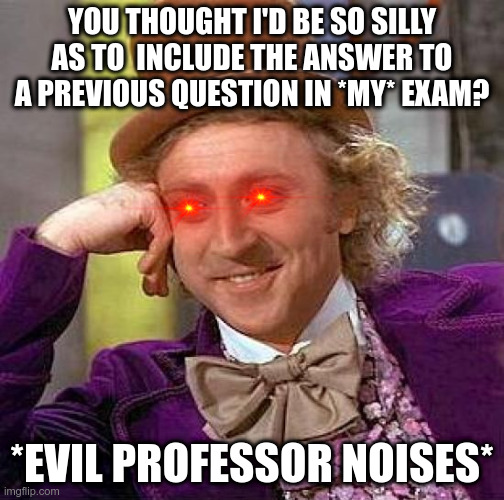

Write a function in Python `determination(m, t)`, which accepts the four elements of a 2x2 matrix, `a`, `b`, `c`, and `d`, as given above.  The function should return true if the determinant of the matrix calculated using floating point arithmetic is the same as what you would calculate by hand.  False otherwise.

(Professor's solution: 5 lines of code)

In [11]:
def determination(a,b,c,d):
    e=2.71828
    mess=a*d-b*c
    mess2=round(mess,5)
    print(mess,mess2)
    if mess==mess2:
        return True
    else:
        return False



In [13]:
print(not determination(0.1, 0.3, 0.2, 0.1))
print(determination(0.5, 0.25, 0.125, 0.5))
print(determination(10,65,2,3))


-0.049999999999999996 -0.05
True
0.21875 0.21875
True
-100 -100
True
